## 使用隨機森林針對乳癌數據集預測

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 載入資料集

In [5]:
data = load_breast_cancer()

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
feature_name = data.feature_names
feature_name

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
data.data.shape  # 569筆資料, 30個特徵

(569, 30)

### 建立隨機森林模型並用交叉驗證查看模型預測準確度

In [37]:
rfc = RandomForestClassifier(n_estimators=50, random_state=90)

score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre

0.9613721804511279

### 調整n_estimators參數

Max score:0.9631265664160402 n_estimators:71
Running time: 46.01961898803711


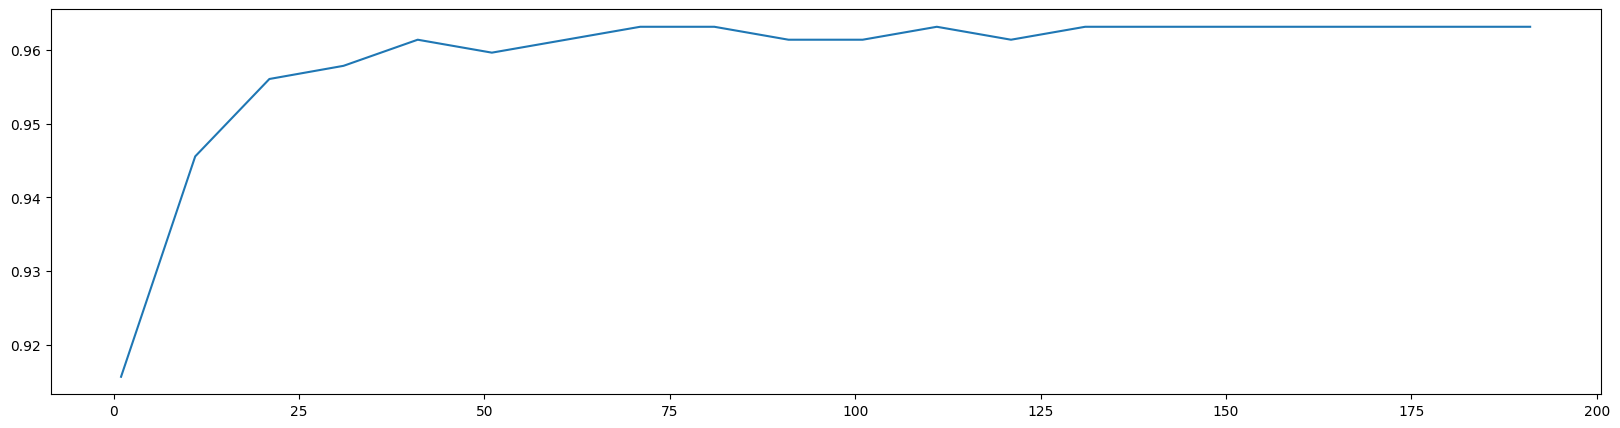

In [38]:
import time

start_time = time.time()
score_l = []

for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, 
                                 n_jobs=-1, 
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    score_l.append(score)
    
print("Max score:{}".format(max(score_l)), 
      "n_estimators:{}".format((score_l.index(max(score_l))*10)+1))

end_time = time.time()
total_time = end_time - start_time

print("Running time:", total_time)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), score_l)
plt.show()

### 確定區間後再細調n_estimators參數

Max score:0.9666353383458647 n_estimators:73
Running time: 20.85200786590576


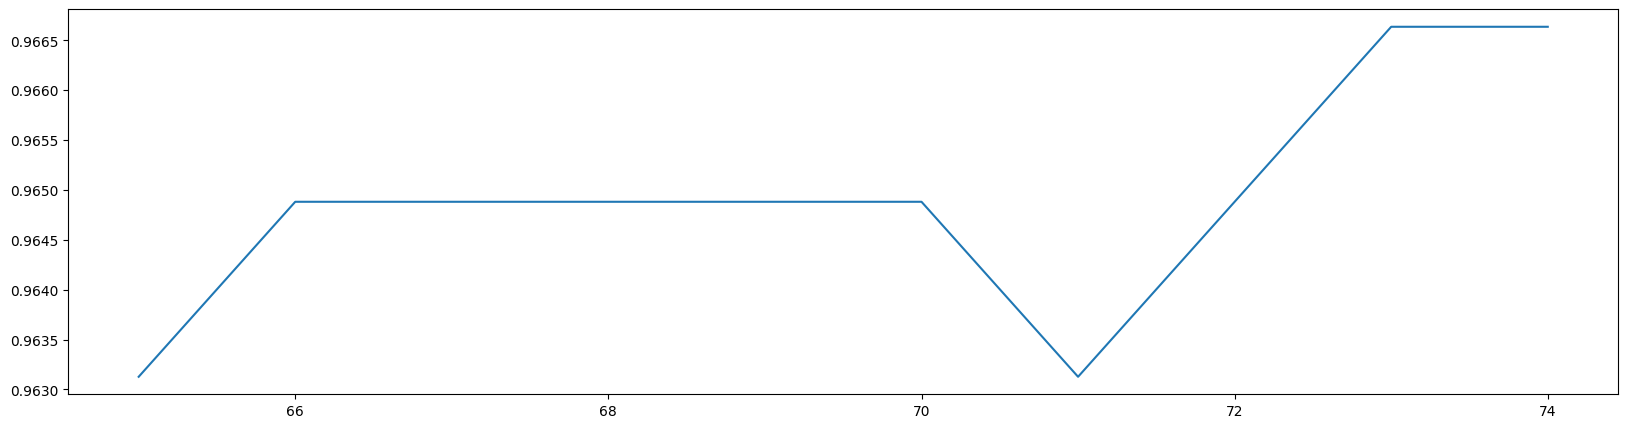

In [33]:
start_time = time.time()
score_l = []

for i in range(65, 75):
    rfc = RandomForestClassifier(n_estimators=i, 
                                 n_jobs=-1, 
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    score_l.append(score)
    
print("Max score:{}".format(max(score_l)), 
      "n_estimators:{}".format(([*range(65, 75)][score_l.index(max(score_l))])))
                                # list(range(65, 75)), 取index為score最大值那個索引

end_time = time.time()
total_time = end_time - start_time

print("Running time:", total_time)
plt.figure(figsize=[20, 5])
plt.plot(range(65, 75), score_l)
plt.show()

### 使用GridSearch調整max_depth
breast_cancer的數據集較小, 可從1-10或1-20層深度來嘗試

In [40]:
param_grid = {"max_depth": np.arange(1, 20, 1)}

rfc = RandomForestClassifier(n_estimators=73,  
                             random_state=90)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [41]:
GS.best_params_

{'max_depth': 8}

In [44]:
GS.best_score_

0.9666353383458647

### 調整max_features
調整max_depth和n_estimators調整後準確度相同\
可以預期若使用min_samples_leaf和min_samples_split這兩個參數剪枝(降低模型複雜度)效果可能也不佳\
可以嘗試使用max_features調整特徵數量(max_features預設為sqrt(n)), 增加特徵數可讓模型更複雜

In [45]:
param_grid = {"max_features": np.arange(5, 30, 1)}

rfc = RandomForestClassifier(n_estimators=73,  
                             random_state=90)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [46]:
GS.best_params_

{'max_features': 24}

In [47]:
GS.best_score_

0.9666666666666668

### 嘗試調整criterion

In [52]:
param_grid = {"criterion": ["gini", "entropy"]}

rfc = RandomForestClassifier(n_estimators=73,
                             max_features=24,
                             random_state=90)

GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=24, n_estimators=73,
                                              random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [53]:
GS.best_params_

{'criterion': 'gini'}

In [54]:
GS.best_score_

0.9666666666666668

### 得出結果, 總結出最佳參數

In [56]:
rfc = RandomForestClassifier(n_estimators=73,
                             max_features=24,
                             random_state=90)

score = cross_val_score(rfc, data.data, data.target, cv=10)

print("max score:", max(score))
print("mean score:", score.mean())

max score: 1.0
mean score: 0.9666666666666668


C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\joblib\_memmapping_reducer.py:612: UserWarning: Failed to delete temporary folder: C:\Users\USER\AppData\Local\Temp\joblib_memmapping_folder_7608_f6dbbfb18c6249caacec0788df361fd1_0c41d7ec304d42ce9f01bb54a4c0cd09
  .format(pool_subfolder))
C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\joblib\_memmapping_reducer.py:612: UserWarning: Failed to delete temporary folder: C:\Users\USER\AppData\Local\Temp\joblib_memmapping_folder_7608_0fa6c4f5611749a99bbddb5d48ec7bc8_1299426580b349d18f48ffc5023f87f2
  .format(pool_subfolder))
C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\joblib\_memmapping_reducer.py:612: UserWarning: Failed to delete temporary folder: C:\Users\USER\AppData\Local\Temp\joblib_memmapping_folder_7608_f6dbbfb18c6249caacec0788df361fd1_5da43a3d430648328705b663441d10dc
  .format(pool_subfolder))
C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\joblib\_memmapping_reducer.py:612: UserWarning: